# Starter code for the regression mini-project

- Loads up/formats a modified version of the dataset (why modified?  we've removed some trouble points that you'll find yourself in the outliers mini-project).
- Draws a little scatterplot of the training/testing data
- You fill in the regression code where indicated:

In [29]:
import sys
import pickle
sys.path.append('../utils/')

from feature_format import feature_format, target_feature_split

with open('../17-final-project/final_project_dataset_modified_unix.pkl', 'rb') as f:
    dictionary = pickle.load(f)

- list the features you want to look at--first item in the 
- list will be the "target" feature

In [30]:
features_list = ['bonus', 'salary']
data = feature_format(dictionary, features_list, remove_any_zeroes=True, sort_keys='../utils/python2_lesson06_keys_unix.pkl')
target, features = target_feature_split(data)

training-testing split needed in regression, just like classification:

In [31]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = 'b'
test_color = 'r'

## ↓↓↓ Your Code Goes Here ↓↓↓

Please name it reg, so that the plotting code below picks it up and plots it correctly. 

Don't forget to change `the test_color` above from `'b'` to `'r'` to differentiate training points from test points.

In [32]:
from sklearn.linear_model import LinearRegression as linreg
reg = linreg()
reg.fit(feature_train, target_train)
pred = reg.predict(feature_test)

# Plot results
- draw the scatterplot, with color-coded training and testing points
- draw the regression line, once it's coded

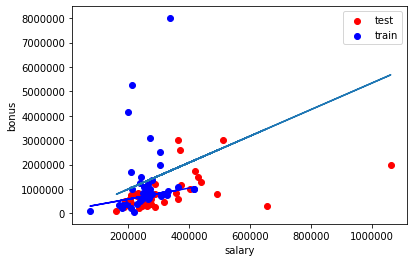

In [33]:
import matplotlib.pyplot as plt

for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color=test_color)

for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color=train_color)

# labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label='test')
plt.scatter(feature_train[0], target_train[0], color=train_color, label='train')

try:
    plt.plot(feature_test, reg.predict(feature_test))
except NameError:
    pass

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b")
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [34]:
# check for the coefficient and intercept

print("coefficient:", reg.coef_)
print("intercept:", reg.intercept_)


coefficient: [2.27410114]
intercept: 124444.38886605436


In [20]:
# check the score, but incorrectly use the training data instead of the test data
wrong_score = reg.score(feature_train, target_train)
print("wrong score:", wrong_score)

wrong score: 0.04550919269952436


In [21]:
# check the actual score of the regression
print("right score:", reg.score(feature_test, target_test))

right score: -1.484992417368511


In [25]:
# use a regression of bonus against long-term incentive (instead of salary as before)
features_list = ['bonus', 'long_term_incentive']
data = feature_format(dictionary, features_list, remove_any_zeroes=True, sort_keys='../utils/python2_lesson06_keys_unix.pkl')
target, features = target_feature_split(data)

from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = 'b'
test_color = 'r'

reg = linreg()
reg.fit(feature_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

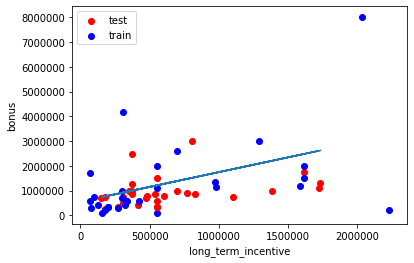

In [26]:
# plot the new data and regression line
for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color=test_color)

for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color=train_color)

# labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label='test')
plt.scatter(feature_train[0], target_train[0], color=train_color, label='train')

try:
    plt.plot(feature_test, reg.predict(feature_test))
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

In [28]:
# check the score of this regression
print(reg.score(feature_test, target_test))

-0.5927128999498643
